 ## Simulated Baseline Generation
 The simulated baseline curve will be constructed using a simple polynomial curve that will
 be randomly adjusted between a minimum and maximum exponent value.  The varying exponent in the baseline
 curve is used to simulate samples having different baselines independent of the concentration level.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm    

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


 The following plot shows the baseline curves using both the minimum and maximum exponent values.

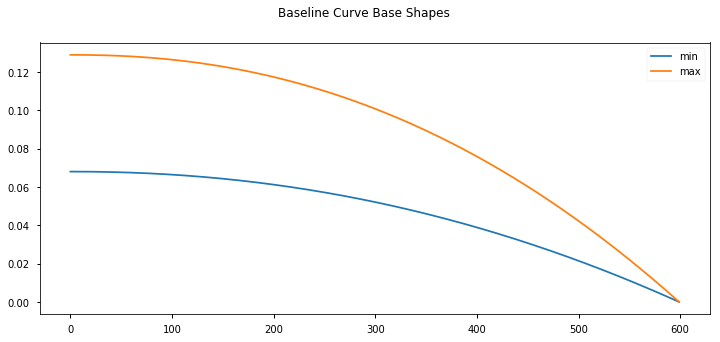

In [2]:
xnum = 600
np.random.seed(42)
x = np.arange(0, xnum, 1.0)
E1_ = (-1e-7*x**2.1)
E1F_ = E1_ + np.min(E1_)*-1.0
E2_ = (-1e-7*x**2.2)
E2F_ = E2_ + np.min(E2_)*-1.0

fig, axs = plt.subplots()
axs.plot(x, E1F_, label='min')
axs.plot(x, E2F_, label='max')
fig.suptitle('Baseline Curve Base Shapes')
plt.legend()


 ## Baseline Curves for Dataset Generation
 This project will vary the baseline curve exponent to generate the simulated datasets.  The goal
 of this project is to determine how well each algorithm can handle signals with varying baselines
 and concentration levels. The following plots show the pure signal combined with each of the minimum
 and maximum baseline curves at 25% and 75% concentration level.

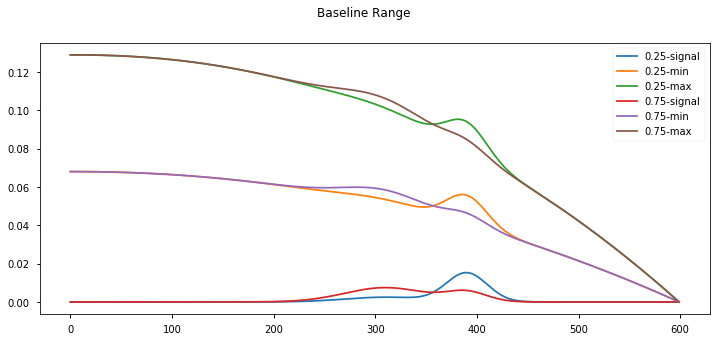

In [3]:
S_1 = norm.pdf(x, loc=310.0, scale=40.0)
S_2 = norm.pdf(x, loc=390.0, scale=20.0)
S_true = np.vstack((S_1, S_2))
C_true = np.array([[0.25, 0.75], [0.75, 0.25]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-signal'.format(C_true[i, 0]))       
    axs.plot(x, signal[i]+E1F_, label='{0:.2f}-min'.format(C_true[i, 0]))
    axs.plot(x, signal[i]+E2F_, label='{0:.2f}-max'.format(C_true[i, 0]))  
fig.suptitle('Baseline Range')      
plt.legend()
